In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('database.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477732 entries, 0 to 477731
Data columns (total 29 columns):
UNIQUE KEY             477732 non-null int64
DATE                   477732 non-null object
TIME                   477732 non-null object
BOROUGH                338390 non-null object
ZIP CODE               338329 non-null float64
LATITUDE               356600 non-null float64
LONGITUDE              356600 non-null float64
LOCATION               356600 non-null object
ON STREET NAME         364552 non-null object
CROSS STREET NAME      335574 non-null object
OFF STREET NAME        58511 non-null object
PERSONS INJURED        477732 non-null int64
PERSONS KILLED         477732 non-null int64
PEDESTRIANS INJURED    477732 non-null int64
PEDESTRIANS KILLED     477732 non-null int64
CYCLISTS INJURED       477732 non-null int64
CYCLISTS KILLED        477732 non-null int64
MOTORISTS INJURED      477732 non-null int64
MOTORISTS KILLED       477732 non-null int64
VEHICLE 1 TYPE        

In [5]:
data.head()

,UNIQUE KEY,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,VEHICLE 1 TYPE,VEHICLE 2 TYPE,VEHICLE 3 TYPE,VEHICLE 4 TYPE,VEHICLE 5 TYPE,VEHICLE 1 FACTOR,VEHICLE 2 FACTOR,VEHICLE 3 FACTOR,VEHICLE 4 FACTOR,VEHICLE 5 FACTOR
0,3146911,01/01/2015,0:20,QUEENS,11358.0,40.751847,-73.787862,"(40.7518471, -73.787862)",47 AVENUE,193 STREET,...,SPORT UTILITY/STATION WAGON,NaN,NaN,NaN,NaN,TRAFFIC CONTROL DISREGARDED,NaN,NaN,NaN,NaN
1,3146180,01/01/2015,0:20,NaN,NaN,40.771289,-73.946693,"(40.7712888, -73.9466928)",NaN,NaN,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,ANIMALS ACTION,NaN,NaN,NaN,NaN
2,3146384,01/01/2015,0:21,BROOKLYN,11205.0,40.689445,-73.955121,"(40.6894449, -73.9551212)",BEDFORD AVENUE,LAFAYETTE AVENUE,...,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN,FATIGUED/DROWSY,UNSPECIFIED,NaN,NaN,NaN
3,3146013,01/01/2015,0:30,BROOKLYN,11213.0,40.673845,-73.925080,"(40.6738445, -73.9250801)",BUFFALO AVENUE,SAINT MARKS AVENUE,...,BUS,PASSENGER VEHICLE,NaN,NaN,NaN,LOST CONSCIOUSNESS,NaN,NaN,NaN,NaN
4,3146120,01/01/2015,0:33,NaN,NaN,NaN,NaN,NaN,RICHMOND TERRACE,SOUTH AVENUE,...,UNKNOWN,PASSENGER VEHICLE,NaN,NaN,NaN,UNSPECIFIED,UNSPECIFIED,NaN,NaN,NaN


In [6]:
data['INJURED'] = data['PERSONS INJURED'] + data['PEDESTRIANS INJURED'] + data['CYCLISTS INJURED'] + data['MOTORISTS INJURED']

data['KILLED'] = data['PERSONS KILLED'] + data['PEDESTRIANS KILLED'] + data['CYCLISTS KILLED'] + data['MOTORISTS KILLED']

In [7]:
#data[['INJURED','PERSONS INJURED','PEDESTRIANS INJURED','CYCLISTS INJURED','MOTORISTS INJURED']]

In [8]:
#data[['KILLED','PERSONS KILLED','PEDESTRIANS KILLED','CYCLISTS KILLED','MOTORISTS KILLED']][data['KILLED'] != 0]

In [9]:
drop_column = ['UNIQUE KEY','LOCATION','ON STREET NAME',
               'CROSS STREET NAME','OFF STREET NAME','DATE','TIME','ZIP CODE',
              'PERSONS INJURED','PEDESTRIANS INJURED','CYCLISTS INJURED','MOTORISTS INJURED',
              'PERSONS KILLED','PEDESTRIANS KILLED','CYCLISTS KILLED','MOTORISTS KILLED']

data_with_drop = data.drop(drop_column,axis=1)
data_with_drop.head()


,BOROUGH,LATITUDE,LONGITUDE,VEHICLE 1 TYPE,VEHICLE 2 TYPE,VEHICLE 3 TYPE,VEHICLE 4 TYPE,VEHICLE 5 TYPE,VEHICLE 1 FACTOR,VEHICLE 2 FACTOR,VEHICLE 3 FACTOR,VEHICLE 4 FACTOR,VEHICLE 5 FACTOR,INJURED,KILLED
0,QUEENS,40.751847,-73.787862,SPORT UTILITY/STATION WAGON,NaN,NaN,NaN,NaN,TRAFFIC CONTROL DISREGARDED,NaN,NaN,NaN,NaN,0,0
1,NaN,40.771289,-73.946693,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,ANIMALS ACTION,NaN,NaN,NaN,NaN,2,0
2,BROOKLYN,40.689445,-73.955121,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN,FATIGUED/DROWSY,UNSPECIFIED,NaN,NaN,NaN,0,0
3,BROOKLYN,40.673845,-73.925080,BUS,PASSENGER VEHICLE,NaN,NaN,NaN,LOST CONSCIOUSNESS,NaN,NaN,NaN,NaN,0,0
4,NaN,NaN,NaN,UNKNOWN,PASSENGER VEHICLE,NaN,NaN,NaN,UNSPECIFIED,UNSPECIFIED,NaN,NaN,NaN,0,0


In [10]:
data_with_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477732 entries, 0 to 477731
Data columns (total 15 columns):
BOROUGH             338390 non-null object
LATITUDE            356600 non-null float64
LONGITUDE           356600 non-null float64
VEHICLE 1 TYPE      473777 non-null object
VEHICLE 2 TYPE      396795 non-null object
VEHICLE 3 TYPE      30264 non-null object
VEHICLE 4 TYPE      6831 non-null object
VEHICLE 5 TYPE      1683 non-null object
VEHICLE 1 FACTOR    474483 non-null object
VEHICLE 2 FACTOR    415401 non-null object
VEHICLE 3 FACTOR    31638 non-null object
VEHICLE 4 FACTOR    7232 non-null object
VEHICLE 5 FACTOR    1762 non-null object
INJURED             477732 non-null int64
KILLED              477732 non-null int64
dtypes: float64(2), int64(2), object(11)
memory usage: 54.7+ MB


In [11]:
'''
data_categorical = data_with_drop
categorical_values = ['BOROUGH','VEHICLE 1 TYPE','VEHICLE 2 TYPE','VEHICLE 3 TYPE','VEHICLE 4 TYPE','VEHICLE 5 TYPE',
                     'VEHICLE 1 FACTOR','VEHICLE 2 FACTOR','VEHICLE 3 FACTOR','VEHICLE 4 FACTOR','VEHICLE 5 FACTOR']

for col_name in categorical_values:
    data_categorical[col_name].fillna('NaN',inplace=True)
    print(data_categorical[col_name].unique())
    for unique_value in data_categorical[col_name].unique():
        temp = (data_categorical[col_name] == unique_value).astype(int)
      
        data_categorical['onehot_{}={}'.format(col_name, unique_value).replace(' ','_')] = temp
'''

"\ndata_categorical = data_with_drop\ncategorical_values = ['BOROUGH','VEHICLE 1 TYPE','VEHICLE 2 TYPE','VEHICLE 3 TYPE','VEHICLE 4 TYPE','VEHICLE 5 TYPE',\n                     'VEHICLE 1 FACTOR','VEHICLE 2 FACTOR','VEHICLE 3 FACTOR','VEHICLE 4 FACTOR','VEHICLE 5 FACTOR']\n\nfor col_name in categorical_values:\n    data_categorical[col_name].fillna('NaN',inplace=True)\n    print(data_categorical[col_name].unique())\n    for unique_value in data_categorical[col_name].unique():\n        temp = (data_categorical[col_name] == unique_value).astype(int)\n      \n        data_categorical['onehot_{}={}'.format(col_name, unique_value).replace(' ','_')] = temp\n"

In [12]:
from sklearn.preprocessing import LabelEncoder

data_categorical = data_with_drop.copy()
categorical_values = ['BOROUGH','VEHICLE 1 TYPE','VEHICLE 2 TYPE','VEHICLE 3 TYPE','VEHICLE 4 TYPE','VEHICLE 5 TYPE',
                     'VEHICLE 1 FACTOR','VEHICLE 2 FACTOR','VEHICLE 3 FACTOR','VEHICLE 4 FACTOR','VEHICLE 5 FACTOR']
categorical_encoders = []
for col_name in categorical_values:
    data_categorical[col_name].fillna('UNKNOWN',inplace=True)
    encoder = LabelEncoder().fit(data_categorical[col_name])
    data_categorical[col_name] = pd.Series(encoder.fit_transform(data_categorical[col_name]))
    categorical_encoders.append(encoder)
   

In [13]:
data_categorical.head()

,BOROUGH,LATITUDE,LONGITUDE,VEHICLE 1 TYPE,VEHICLE 2 TYPE,VEHICLE 3 TYPE,VEHICLE 4 TYPE,VEHICLE 5 TYPE,VEHICLE 1 FACTOR,VEHICLE 2 FACTOR,VEHICLE 3 FACTOR,VEHICLE 4 FACTOR,VEHICLE 5 FACTOR,INJURED,KILLED
0,3,40.751847,-73.787862,13,15,15,15,11,41,43,38,36,25,0,0
1,5,40.771289,-73.946693,8,15,15,15,11,3,43,38,36,25,2,0
2,1,40.689445,-73.955121,8,15,15,15,11,14,46,38,36,25,0,0
3,1,40.673845,-73.925080,2,8,15,15,11,21,43,38,36,25,0,0
4,5,NaN,NaN,15,8,15,15,11,46,46,38,36,25,0,0


In [14]:
import sklearn

In [15]:
data_categorical.dropna(inplace=True)
data['VEHICLE 1 TYPE'].unique()

array(['SPORT UTILITY/STATION WAGON', 'PASSENGER VEHICLE', 'BUS',
       'UNKNOWN', 'TAXI', 'VAN', 'FIRE TRUCK', 'OTHER',
       'LARGE COM VEH(6 OR MORE TIRES)', 'LIVERY VEHICLE', 'SCOOTER',
       'PICK-UP TRUCK', 'AMBULANCE', 'SMALL COM VEH(4 TIRES)',
       'MOTORCYCLE', 'BICYCLE', nan, 'PEDICAB'], dtype=object)

In [16]:
data_categorical.head()

,BOROUGH,LATITUDE,LONGITUDE,VEHICLE 1 TYPE,VEHICLE 2 TYPE,VEHICLE 3 TYPE,VEHICLE 4 TYPE,VEHICLE 5 TYPE,VEHICLE 1 FACTOR,VEHICLE 2 FACTOR,VEHICLE 3 FACTOR,VEHICLE 4 FACTOR,VEHICLE 5 FACTOR,INJURED,KILLED
0,3,40.751847,-73.787862,13,15,15,15,11,41,43,38,36,25,0,0
1,5,40.771289,-73.946693,8,15,15,15,11,3,43,38,36,25,2,0
2,1,40.689445,-73.955121,8,15,15,15,11,14,46,38,36,25,0,0
3,1,40.673845,-73.925080,2,8,15,15,11,21,43,38,36,25,0,0
5,1,40.656684,-73.929896,8,13,13,8,11,46,46,41,39,25,4,0


In [17]:
data_categorical.corr()

,BOROUGH,LATITUDE,LONGITUDE,VEHICLE 1 TYPE,VEHICLE 2 TYPE,VEHICLE 3 TYPE,VEHICLE 4 TYPE,VEHICLE 5 TYPE,VEHICLE 1 FACTOR,VEHICLE 2 FACTOR,VEHICLE 3 FACTOR,VEHICLE 4 FACTOR,VEHICLE 5 FACTOR,INJURED,KILLED
BOROUGH,1.000000,-0.053614,0.008753,0.018841,-0.008408,-0.061468,-0.021380,-0.005171,-0.086935,-0.010741,-0.006085,-0.009781,-0.005677,0.020950,0.004218
LATITUDE,-0.053614,1.000000,-0.604964,-0.001150,0.002797,0.003860,0.001494,0.000090,0.004263,-0.012317,-0.003114,-0.001166,-0.000971,-0.005324,-0.000880
LONGITUDE,0.008753,-0.604964,1.000000,-0.003609,-0.004039,-0.004146,-0.002469,-0.000957,0.002902,0.004014,-0.000029,0.000259,-0.000026,0.006788,0.000073
VEHICLE 1 TYPE,0.018841,-0.001150,-0.003609,1.000000,0.122893,0.023518,0.007404,0.002630,-0.082479,0.009717,0.010750,0.007606,0.004155,-0.006392,-0.002460
VEHICLE 2 TYPE,-0.008408,0.002797,-0.004039,0.122893,1.000000,0.086952,0.041619,0.018522,-0.005890,0.065632,0.007766,0.005341,0.004019,-0.015290,0.015531
VEHICLE 3 TYPE,-0.061468,0.003860,-0.004146,0.023518,0.086952,1.000000,0.398217,0.202382,0.013769,0.035726,0.013174,-0.004007,-0.001211,-0.136810,-0.002980
VEHICLE 4 TYPE,-0.021380,0.001494,-0.002469,0.007404,0.041619,0.398217,1.000000,0.433987,0.005814,0.023319,0.041496,-0.003525,0.000666,-0.100589,-0.010062
VEHICLE 5 TYPE,-0.005171,0.000090,-0.000957,0.002630,0.018522,0.202382,0.433987,1.000000,0.003490,0.012259,0.033235,0.027639,-0.006671,-0.064345,-0.009815
VEHICLE 1 FACTOR,-0.086935,0.004263,0.002902,-0.082479,-0.005890,0.013769,0.005814,0.003490,1.000000,0.382311,0.071816,0.033859,0.018511,-0.019984,0.001351
VEHICLE 2 FACTOR,-0.010741,-0.012317,0.004014,0.009717,0.065632,0.035726,0.023319,0.012259,0.382311,1.000000,0.185375,0.084571,0.041746,-0.002092,0.003148


Populating the interactive namespace from numpy and matplotlib


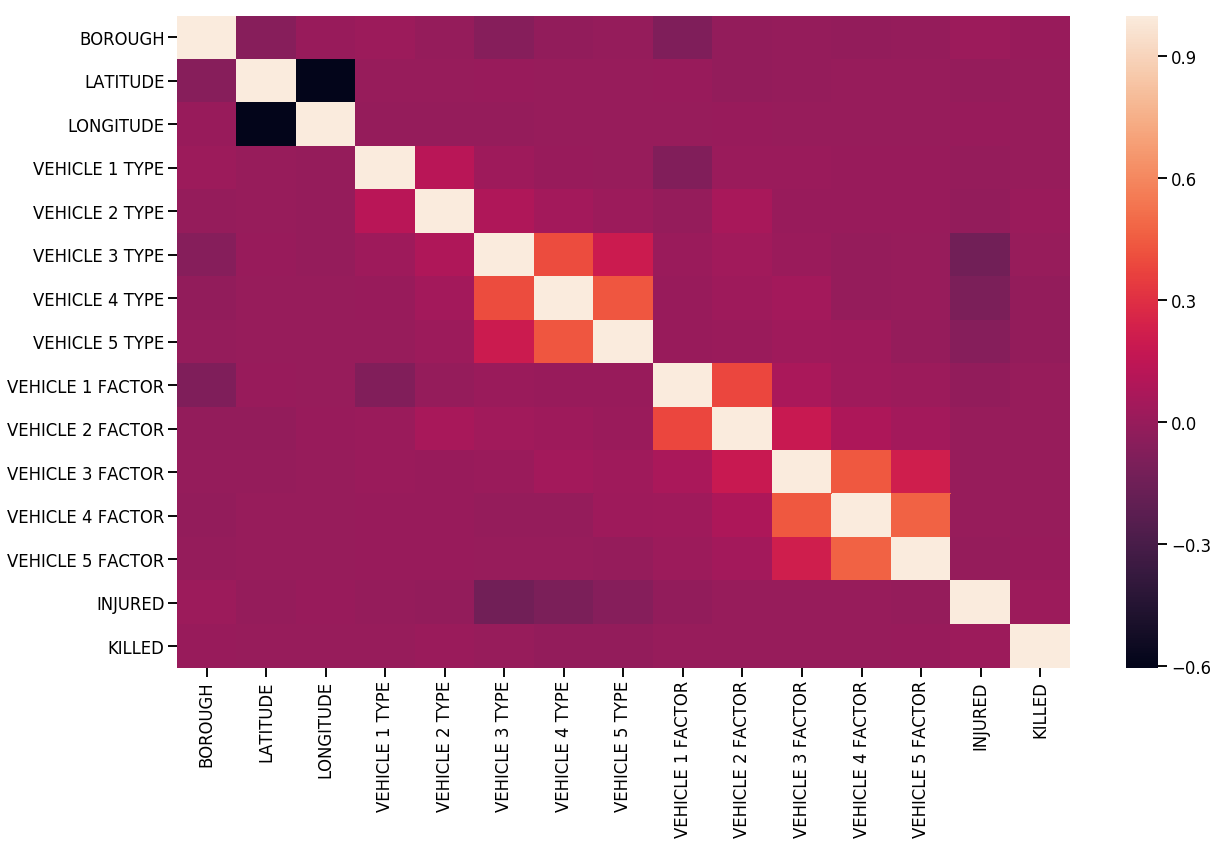

In [18]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 12)

import seaborn as sns
sns.set_context('talk')
corr = data_categorical.corr()

sns.heatmap(corr)

In [19]:
#corr_drop = ['MOTORISTS INJURED','PEDESTRIANS KILLED']
#data_categorical.drop(corr_drop,axis=1,inplace=True)

In [20]:
data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356600 entries, 0 to 477731
Data columns (total 15 columns):
BOROUGH             356600 non-null int64
LATITUDE            356600 non-null float64
LONGITUDE           356600 non-null float64
VEHICLE 1 TYPE      356600 non-null int64
VEHICLE 2 TYPE      356600 non-null int64
VEHICLE 3 TYPE      356600 non-null int64
VEHICLE 4 TYPE      356600 non-null int64
VEHICLE 5 TYPE      356600 non-null int64
VEHICLE 1 FACTOR    356600 non-null int64
VEHICLE 2 FACTOR    356600 non-null int64
VEHICLE 3 FACTOR    356600 non-null int64
VEHICLE 4 FACTOR    356600 non-null int64
VEHICLE 5 FACTOR    356600 non-null int64
INJURED             356600 non-null int64
KILLED              356600 non-null int64
dtypes: float64(2), int64(13)
memory usage: 43.5 MB


In [21]:
from sklearn.decomposition import PCA

p = PCA(n_components=2)

pd = p.fit_transform(data_categorical)


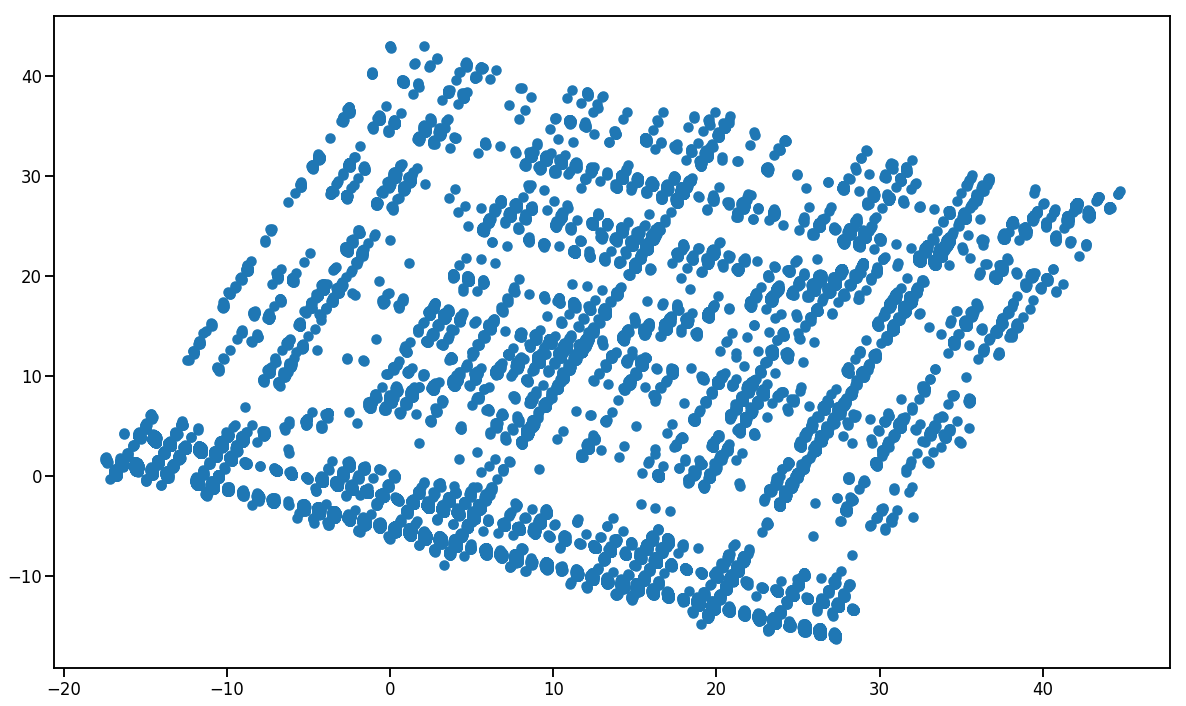

In [22]:
plt.scatter(pd[:,0],pd[:,1])

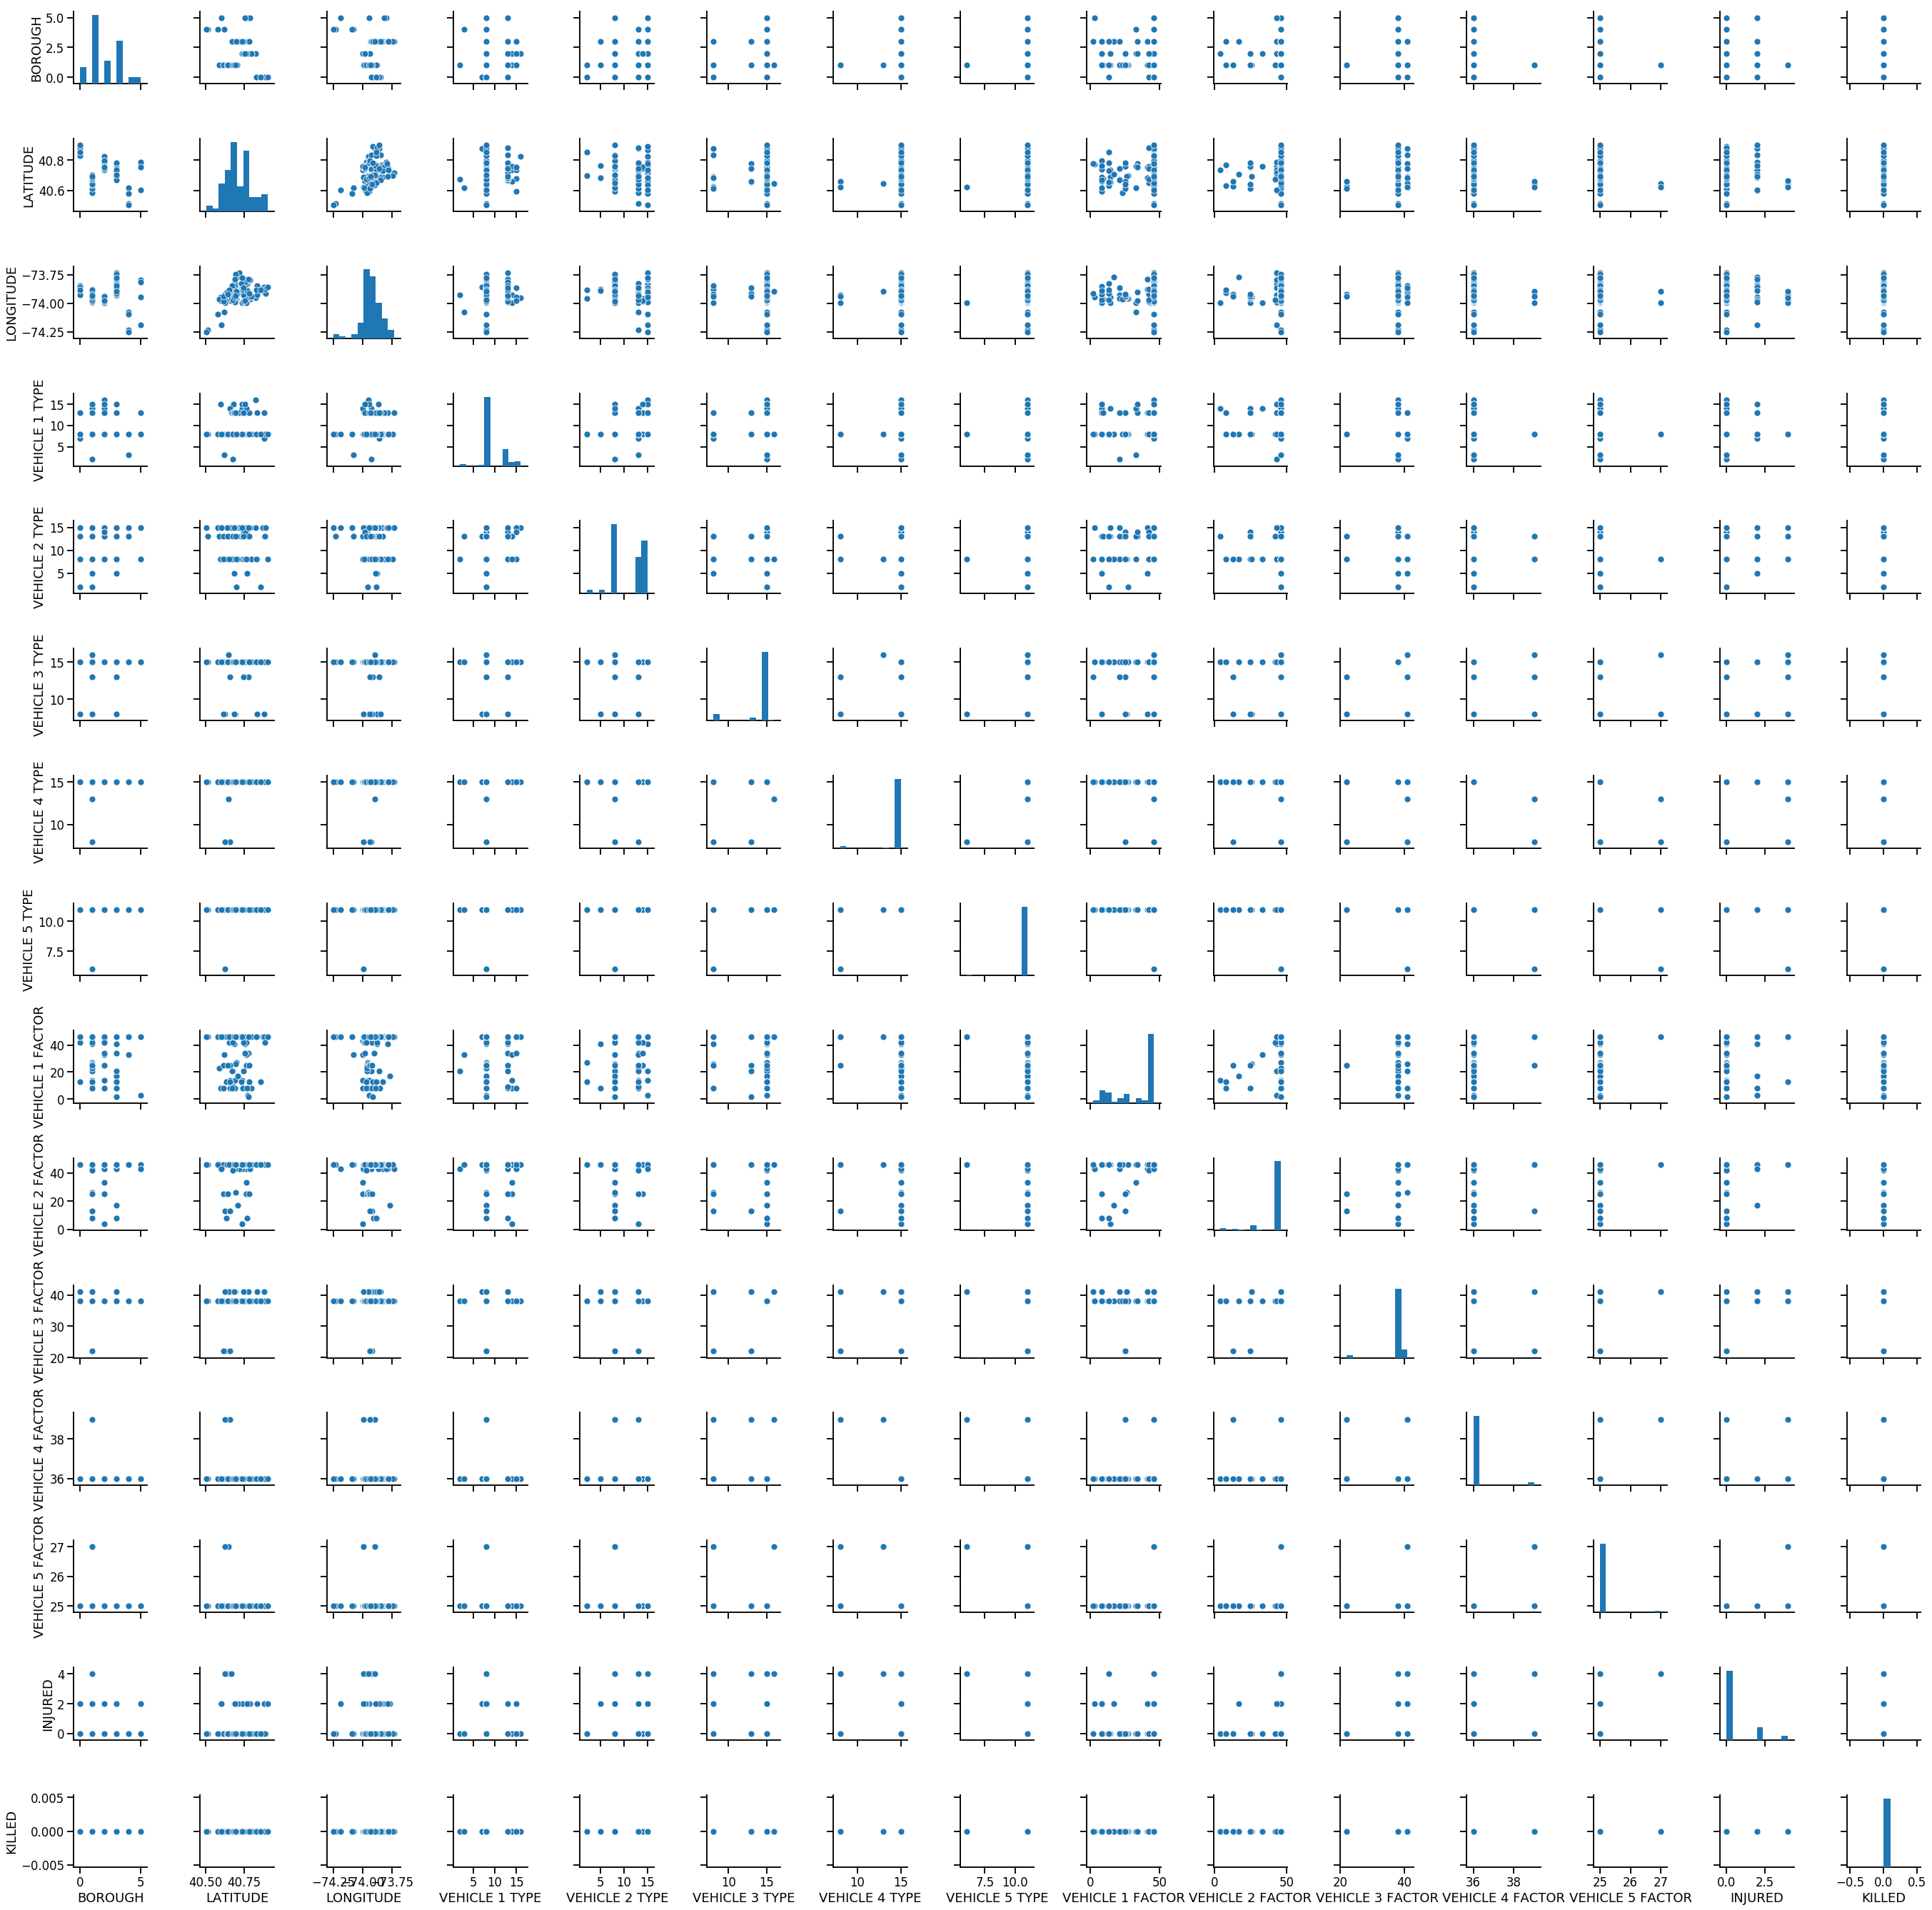

In [23]:
%%time
sns.pairplot(data_categorical[:100])

## lab2

In [24]:
from sklearn.cluster import KMeans
n_clusters=10
km = KMeans(n_clusters=n_clusters).fit(data_categorical)

In [25]:
data_after_clustering = data_categorical
data_after_clustering['label'] = km.labels_

In [172]:
from sklearn.model_selection import train_test_split
y = data_after_clustering['label'].T
X = data_after_clustering.drop('label',axis=1)


In [33]:
p = PCA(n_components=3)

pd = p.fit_transform(X)

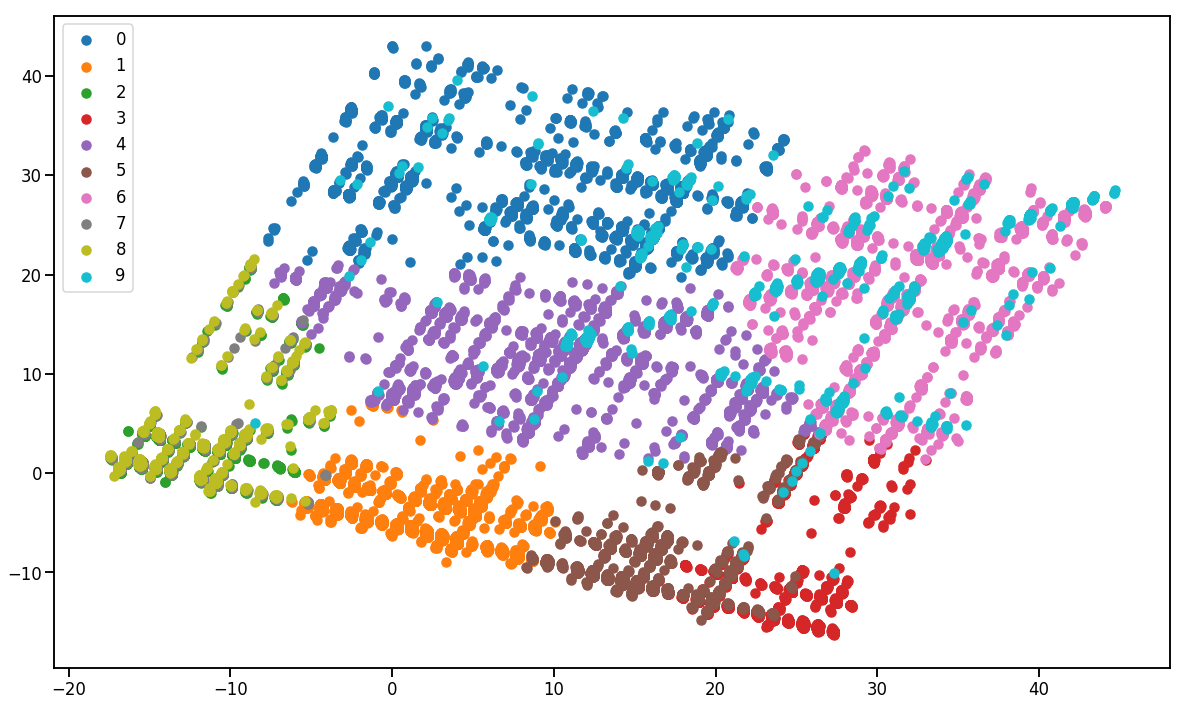

In [32]:
for i in range(n_clusters):
    point_plot = pd[y==i]
    plt.scatter(point_plot[:,0],point_plot[:,1],label=i)
    
plt.legend(loc='upper left')

Populating the interactive namespace from numpy and matplotlib


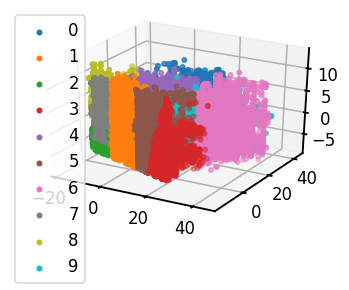

In [42]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(n_clusters):
    point_plot = pd[y==i]
    ax.scatter(point_plot[:,0],point_plot[:,1],point_plot[:,2],label=i)
    
ax.legend(loc='upper left')
plt.show()


## lab3

In [43]:
import keras

Using TensorFlow backend.


In [58]:
import keras_metrics

In [163]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)

In [164]:
# create model
model = Sequential()
model.add(Dense(100, input_dim=X.shape[1], activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_clusters, activation='sigmoid'))

In [165]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [177]:
#y = np.array([np.array(np.eye(n_clusters)[label]) for label in km.labels_])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,stratify=y)

y_train = np.array([np.array(np.eye(n_clusters)[label]) for label in y_train])
y_test = np.array([np.array(np.eye(n_clusters)[label]) for label in y_test])

In [178]:
y.value_counts()

8    85554
2    82992
5    51892
3    36150
1    28654
6    27967
7    20874
4    15232
0     5496
9     1789
Name: label, dtype: int64

In [179]:
# Fit the model
keras_model = model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
213960/213960 [==============================] - 17s 81us/step - loss: 0.0225 - acc: 0.9942
Epoch 2/10
213960/213960 [==============================] - 18s 86us/step - loss: 0.0066 - acc: 0.9977
Epoch 3/10
213960/213960 [==============================] - 18s 85us/step - loss: 0.0055 - acc: 0.9981
Epoch 4/10
213960/213960 [==============================] - 17s 81us/step - loss: 0.0050 - acc: 0.9983
Epoch 5/10
213960/213960 [==============================] - 16s 74us/step - loss: 0.0046 - acc: 0.9985
Epoch 6/10
213960/213960 [==============================] - 20s 96us/step - loss: 0.0042 - acc: 0.9986
Epoch 7/10
213960/213960 [==============================] - 21s 98us/step - loss: 0.0040 - acc: 0.9987
Epoch 8/10
213960/213960 [==============================] - 21s 98us/step - loss: 0.0038 - acc: 0.9987
Epoch 9/10
213960/213960 [==============================] - 22s 102us/step - loss: 0.0038 - acc: 0.9988
Epoch 10/10
213960/213960 [==============================] - 21s 100us/s

In [180]:
#model.evaluate(X_train,y_train)

In [181]:
#model.predict(X_test)

In [182]:
keras_model.history['acc']

[0.9942456479745839,
 0.9977248070072428,
 0.998102448124332,
 0.9983207133606808,
 0.9984782196735975,
 0.9985847816186032,
 0.9986707790864252,
 0.9987277991583602,
 0.9987717327346844,
 0.998829687376026]

In [183]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

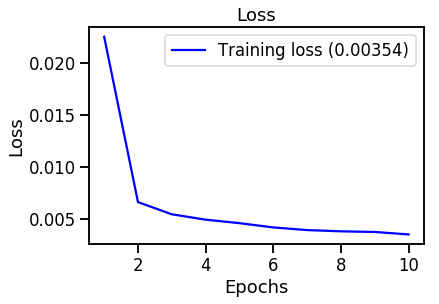

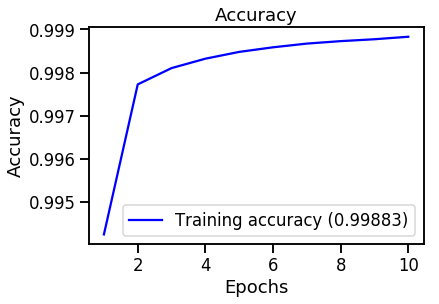

In [184]:
plot_history(keras_model)

'---'

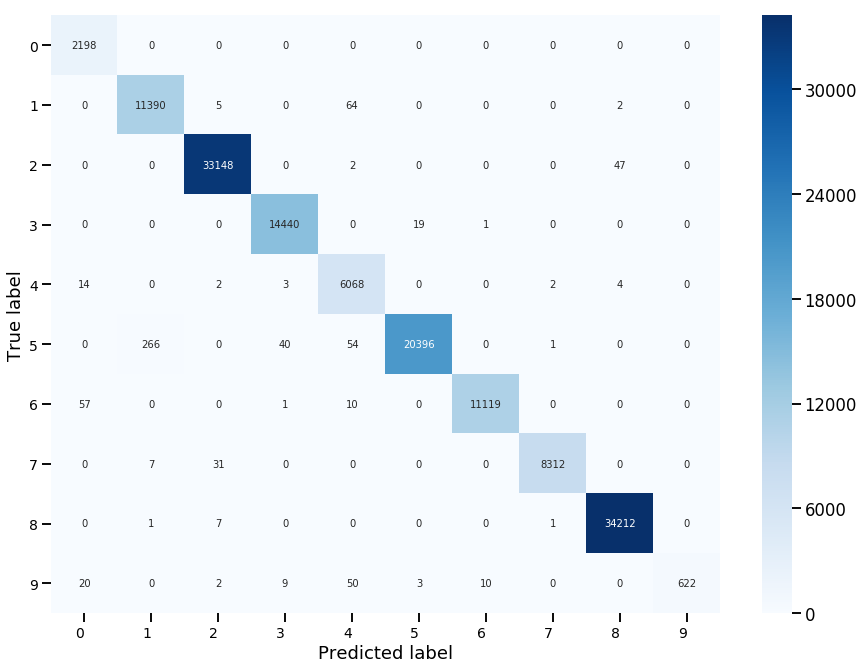

In [185]:
y_true = np.argmax(y_test,axis=1)
y_pred = np.argmax(model.predict(X_test),axis=1)
cm = sklearn.metrics.confusion_matrix(y_true,y_pred)
plt.figure(figsize=(15,11))
#plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)
heatmap = sns.heatmap(cm, annot=True, fmt="d",cmap=plt.cm.Blues)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), ha='right', fontsize=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
'---'